## Project for Machine Learning and Statistics module
#### Hayley Doherty G00387849
---

Create a web service that makes predictions of wind turbine power based on wind speed values.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [127]:
x = np.array(df['speed'])
y = np.array(df['power'])

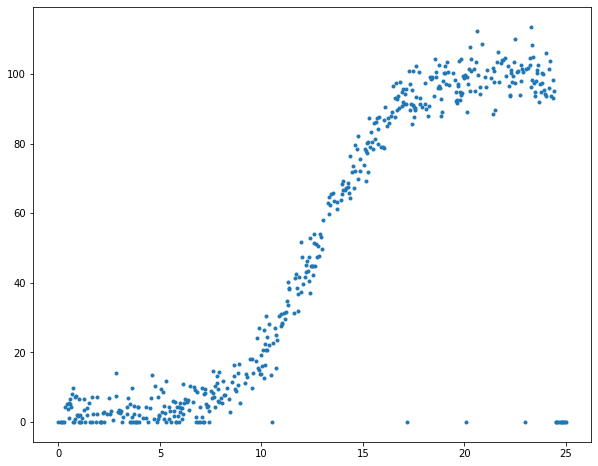

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.show()

In [20]:
import sklearn.cluster as skcl
from scipy.spatial.distance import cdist

Before we can group the data points into clusters, we have to first determine the optimal number of clusters(k) to use. For each value of k we use k-means and the inertia attribute to get the sum of squared distances of samples to the nearest centroid [1].  The larger k is, the closer the sum of squared distance gets to zero. The optimal value for k is that point after which the sum of squared distances decreases in a linear fashion [2].

In [28]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = skcl.KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

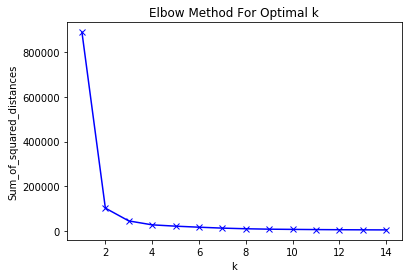

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For this dataset we can determine that the optimal number of clusters is 3.

In [72]:
kmeans = skcl.KMeans(n_clusters=3, random_state = 0).fit(df)
centroids = kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,

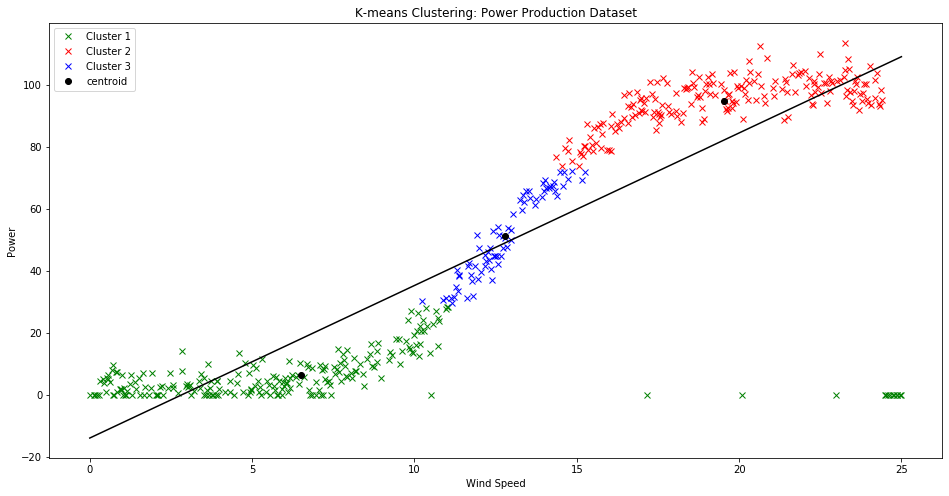

In [35]:

plt.figure(figsize=(16,8))
plt.plot(x[kmeans.labels_ == 0], y[kmeans.labels_ == 0], 'gx', label="Cluster 1")
plt.plot(x[kmeans.labels_ == 1], y[kmeans.labels_ == 1], 'rx', label="Cluster 2")
plt.plot(x[kmeans.labels_ == 2], y[kmeans.labels_ == 2], 'bx', label="Cluster 3")
plt.plot(centroids[:, 0], centroids[:, 1], 'ko', label='centroid')


m, c = np.polyfit(x, y, 1)
plt.plot(x, m * x + c, 'k-')
plt.title("K-means Clustering: Power Production Dataset")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [39]:
m, c

(4.917595665404671, -13.89990263051961)

In [26]:
newvals = np.array([[20, 15], [20, 80]])
predictions = kmeans.predict(newvals)
predictions

array([0, 1])

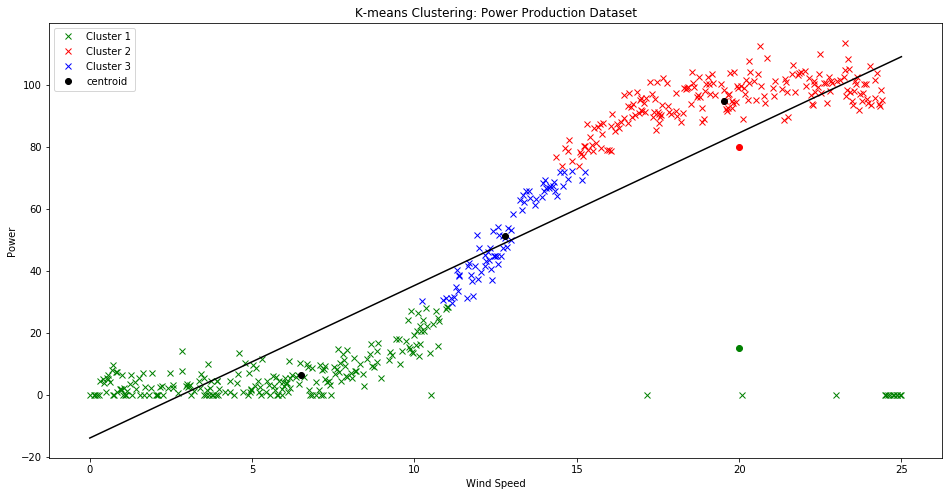

In [27]:
plt.figure(figsize=(16,8))
plt.plot(df.iloc[:,0][kmeans.labels_ == 0], df.iloc[:,1][kmeans.labels_ == 0], 'gx', label="Cluster 1")
plt.plot(df.iloc[:,0][kmeans.labels_ == 1], df.iloc[:,1][kmeans.labels_ == 1], 'rx', label="Cluster 2")
plt.plot(df.iloc[:,0][kmeans.labels_ == 2], df.iloc[:,1][kmeans.labels_ == 2], 'bx', label="Cluster 3")
plt.plot(centroids[:, 0], centroids[:, 1], 'ko', label='centroid')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'ro')
x = df.iloc[:,0]
y = df.iloc[:,1]
m, c = np.polyfit(x, y, 1)
plt.plot(x, m * x + c, 'k-')
plt.title("K-means Clustering: Power Production Dataset")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [73]:
x = x.reshape(-1, 1)
x

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

In [97]:
power_pred = kmeans.fit_predict(x, sample_weight=None)
power_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
import sklearn.neighbors as nei

In [78]:
knn = nei.KNeighborsClassifier(n_neighbors = 5)

In [93]:
#pd.DataFrame(df).to_numpy()
inputs = np.array(df['speed'].values)
outputs = np.array(df['power'].values)
inputs = inputs.reshape(-1, 1)
#outputs = outputs.reshape(-1, 1)


In [94]:
knn.fit(inputs, outputs)

ValueError: Unknown label type: 'continuous'

In [59]:
from numpy.random import default_rng
rng = default_rng()

In [99]:
df = np.array(df)

In [61]:
df

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

In [62]:
df = rng.permutation(df)
df

array([[2.48750e+01, 0.00000e+00],
       [7.83300e+00, 1.13210e+01],
       [3.62900e+00, 9.89000e+00],
       [2.19220e+01, 1.04052e+02],
       [3.80400e+00, 0.00000e+00],
       [2.42990e+01, 9.36940e+01],
       [1.74920e+01, 9.11250e+01],
       [9.20900e+00, 1.11200e+01],
       [2.47750e+01, 0.00000e+00],
       [2.43490e+01, 9.30780e+01],
       [9.53500e+00, 1.80420e+01],
       [8.20800e+00, 7.78500e+00],
       [1.25880e+01, 5.40790e+01],
       [2.25000e-01, 0.00000e+00],
       [2.25230e+01, 9.72560e+01],
       [1.87690e+01, 1.02440e+02],
       [3.67900e+00, 0.00000e+00],
       [1.66920e+01, 8.95270e+01],
       [9.30900e+00, 1.28810e+01],
       [1.39890e+01, 6.55960e+01],
       [2.41740e+01, 9.58690e+01],
       [2.14210e+01, 1.01721e+02],
       [8.75900e+00, 8.93700e+00],
       [1.00100e+00, 6.51100e+00],
       [7.18200e+00, 6.70000e-02],
       [1.96450e+01, 9.24610e+01],
       [6.35600e+00, 5.84200e+00],
       [1.23370e+01, 4.72820e+01],
       [1.70670e+01,

In [128]:
x = x.reshape(-1, 1)

In [46]:
df

In [98]:
knn = nei.KNeighborsRegressor(n_neighbors = 5)

In [107]:
knn.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [120]:
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       4.33100e+00, 5.18600e+00, 3.82600e+00, 1.04800e+00, 5.55300e+00,
       6.49800e+00, 5.24100e+00, 4.22000e+00, 7.97400e+00, 9.74600e+00,
       0.00000e+00, 0.00000e+00, 7.27100e+00, 7.95000e-01, 7.35000e+00,
       1.99600e+00, 1.60900e+00, 2.06400e+00, 6.51100e+00, 0.00000e+00,
       2.08500e+00, 0.00000e+00, 1.21000e-01, 1.20800e+00, 3.37300e+00,
       6.51000e+00, 0.00000e+00, 4.15600e+00, 2.00500e+00, 5.35200e+00,
       0.00000e+00, 7.22100e+00, 0.00000e+00, 2.43900e+00, 0.00000e+00,
       2.35900e+00, 7.04800e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       2.70100e+00, 2.86900e+00, 0.00000e+00, 2.28700e+00, 6.94700e+00,
       2.37000e+00, 3.16500e+00, 6.67000e-01, 7.55900e+00, 1.41310e+01,
       2.89400e+00, 3.57800e+00, 2.63300e+00, 2.83600e+00, 3.06300e+00,
       0.00000e+00, 1.36000e+00, 4.33400e+00, 2.16700e+00, 6.81900e+00,
       0.00000e+00, 5.30000e+00, 0.00000e+00, 1.53500e+00, 9.890

In [ ]:
y_pred = knn.predict(x)

In [111]:
y_pred

array([  0.    ,   0.    ,   0.    ,   0.8662,   1.9034,   2.6686,
         2.8782,   4.4222,   4.4332,   4.4332,   4.512 ,   4.512 ,
         6.7358,   4.388 ,   4.388 ,   4.9982,   4.9982,   3.0832,
         3.0832,   3.8042,   3.906 ,   2.436 ,   2.436 ,   2.4538,
         2.132 ,   1.7434,   1.7434,   0.6828,   1.3574,   2.2424,
         3.0494,   3.2088,   3.6046,   2.3026,   3.7468,   2.9156,
         3.0024,   1.932 ,   1.932 ,   2.3692,   2.3692,   1.8814,
         1.8814,   1.114 ,   1.114 ,   1.114 ,   1.114 ,   1.5714,
         2.8946,   2.9538,   3.0872,   3.0872,   5.5784,   5.7658,
         5.7658,   5.2144,   3.0008,   3.0008,   2.422 ,   2.422 ,
         1.9784,   2.3186,   3.724 ,   3.724 ,   3.724 ,   2.7308,
         3.345 ,   3.345 ,   3.345 ,   2.739 ,   3.658 ,   3.351 ,
         1.373 ,   1.373 ,   1.373 ,   1.8   ,   2.206 ,   2.206 ,
         2.206 ,   2.206 ,   1.7354,   2.0898,   2.0898,   3.2476,
         5.034 ,   5.034 ,   7.1228,   6.3832,   3.854 ,   4.0

In [125]:
x = [[15]]
#x = x.reshape(-1, 1)
knn.predict(x)

array([75.5042])

In [126]:
y == y_pred

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [129]:
knn.score(x, y)

0.9642634068800078

[1]. Tutorial: How to determine th eoptimal number of clusters for k-means clustering https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

[2]. Elbow method for optimal value of k in KMeans https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/